In [47]:
import platform
mysystem = platform.system()
# file_id = "1w5wMziz2vYqvN5y8qnhuPVtsbxTlQb21" #small data set
file_id = "1LT5aEa0wX8nttZGecn0PDZP561QxlMVW"  #large data set
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
if mysystem != 'Windows':
    !wget -o waterdata.csv --no-check-certificate "$file_download_link"
  
else:
    print('Please download the data using the following link:', file_download_link)

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import math


In [49]:
df = pd.read_csv('/content/uc?export=download&id=1LT5aEa0wX8nttZGecn0PDZP561QxlMVW')
print(df)

     STATION_ID DURATION      DATE TIME       OBS DATE  STORAGE  DATA_FLAG  \
0           BER        D  20010101 0000  20010101 0000  1363258        NaN   
1           BER        D  20010102 0000  20010102 0000  1363077        NaN   
2           BER        D  20010103 0000  20010103 0000  1362897        NaN   
3           BER        D  20010104 0000  20010104 0000  1362716        NaN   
4           BER        D  20010105 0000  20010105 0000  1362535        NaN   
...         ...      ...            ...            ...      ...        ...   
7665        BER        D  20211227 0000  20211227 0000  1004509        NaN   
7666        BER        D  20211228 0000  20211228 0000  1007020        NaN   
7667        BER        D  20211229 0000  20211229 0000  1011107        NaN   
7668        BER        D  20211230 0000  20211230 0000  1014256        NaN   
7669        BER        D  20211231 0000  20211231 0000  1015201        NaN   

     UNITS INFLOW OUTFLOW  
0       AF   -151      95  
1      

In [50]:
# Drop STATION_ID, 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'
df = df.drop(columns=['STATION_ID', 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'])

# filter out rows with null values
df = df[pd.to_numeric(df['INFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['OUTFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['STORAGE'], errors='coerce').notnull()]

# covert INFLOW to int64
df['INFLOW'] = df['INFLOW'].astype(np.int64) 
df['OUTFLOW'] = df['OUTFLOW'].astype(np.int64) 
df['STORAGE'] = df['STORAGE'].astype(np.int64) 



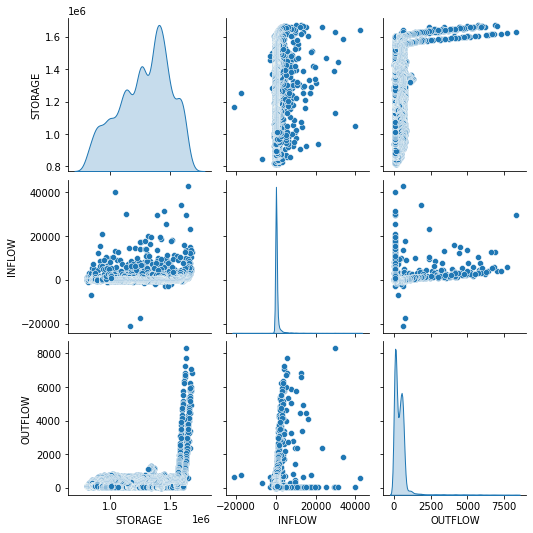

In [51]:
_ = sns.pairplot(df, diag_kind='kde')

In [52]:
df.describe()

,STORAGE,INFLOW,OUTFLOW
count,7.664000e+03,7664.000000,7664.000000
mean,1.286560e+06,451.876044,393.736039
std,2.081503e+05,1832.642306,555.676215
min,8.149870e+05,-21099.000000,0.000000
25%,1.132734e+06,-28.000000,90.000000
50%,1.315267e+06,87.500000,315.000000
75%,1.438667e+06,297.250000,541.000000
max,1.675491e+06,42576.000000,8293.000000


In [53]:
import plotly.figure_factory as ff


fig = ff.create_scatterplotmatrix(df, diag='histogram', index='', width=1000, height=1000, opacity=.8)
fig.show()

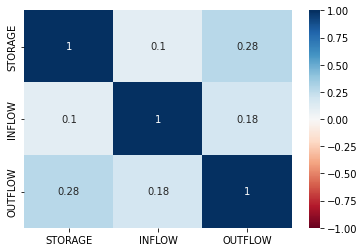

In [54]:
# Generate heatmap
data = df.copy().corr()
_ = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')